In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from utilities import plotting
from utilities import stats
from utilities import timestamps
from utilities import import_export
from utilities import polygon_selection
from mpl_toolkits.basemap import Basemap
from itertools import product
import matplotlib.pyplot as plt

# Importing data

In [2]:
df = import_export.import_catalog(location='/home/max/research/kumamoto/data/ccu.dat', delimiter='\t', names=['lon', 'lat', 'decimal_year', 'month', 'day', 'mag'
                                                        , 'depth', 'hour', 'minute', 'second', 'horizontal_error'
                                                        , 'depth_error', 'mag_err'])

# Specifying an earthquake mainshock

In [3]:
eq = {'coordinates':(130.763, 32.7545), 'time':'2016-04-14 12:26:00', 'tz':'UTC', 'magnitude':7.0}

# Filtering data from the catalog for the region

In [4]:
df_regional = polygon_selection.get_node_data(data=df, node=eq['coordinates'], radius=200, m=1)

In [5]:
df_regional = df_regional.loc[df_regional.index < eq['time']]
df_regional = df_regional[df_regional.depth <=25]
df_regional = df_regional[df_regional.mag >= 0.5]

# Making plots for the region

(<matplotlib.figure.Figure at 0x7fdfb88a46d8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fdfb8852278>)

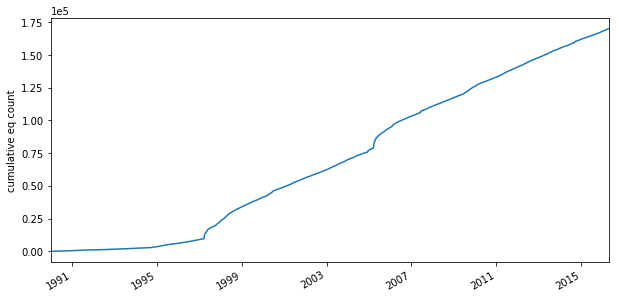

In [6]:
fig, ax = plt.subplots(figsize=(10,5))
plotting.plot_seismicity_rate(dataframe=df_regional, fig=fig, ax=ax)

(<mpl_toolkits.basemap.Basemap at 0x7fdfb73cbeb8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fdfaf632be0>)

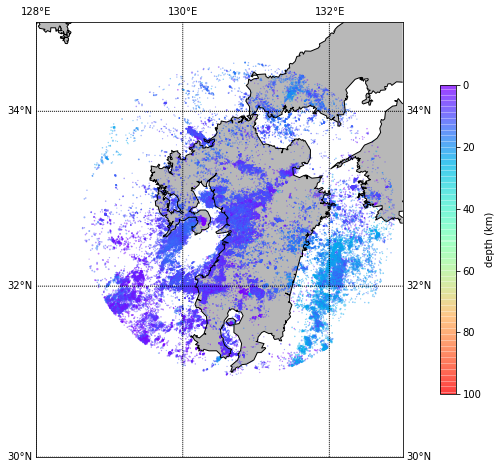

In [7]:
plotting.plot_seismicity_map(dataframe=df_regional)

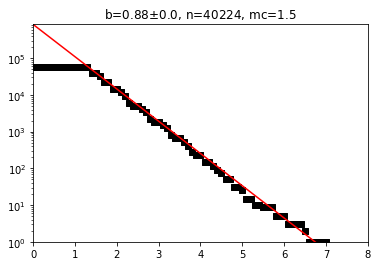

In [10]:
fig, ax = plt.subplots()
plotting.plot_fmd_diagram(df_regional[df_regional.mag > 1.2], fig, ax)

In [11]:

def fmd_values(magnitudes, bin_width=0.1):
    """
    params magnitudes : numpy.array
    params bin_width : float

    returns a,b,bstd, n-values if above the earthquake count threshold
    else returns np.nans
    """

    length = magnitudes.shape[0]
    minimum = magnitudes.min()
    average = magnitudes.mean()
    b_value = (1 / (average - (minimum - (bin_width / 2)))) * np.log10(np.exp(1))

    sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
    b_error = 2.3 * b_value ** 2 * np.sqrt(sigma_mag)

    a_value = np.log10(length) + b_value * minimum

    return a_value, b_value, b_error, length


In [13]:
fmd_values(df_regional[df_regional.mag > 1.2].mag)

(5.8360873727571896, 0.83329124206468141, 0.0032695286956258562, 56599)